### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [7]:
data['gender'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

In [8]:
data['maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [9]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [10]:
data['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [11]:
data['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# Delete car column as it is not usefull anyway.
data.drop('car', inplace=True, axis=1)

In [13]:
fields_with_na = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
for a in fields_with_na:
    data[a].fillna('never', inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon?



In [15]:
data['Y'].value_counts(normalize=True).loc[1]

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

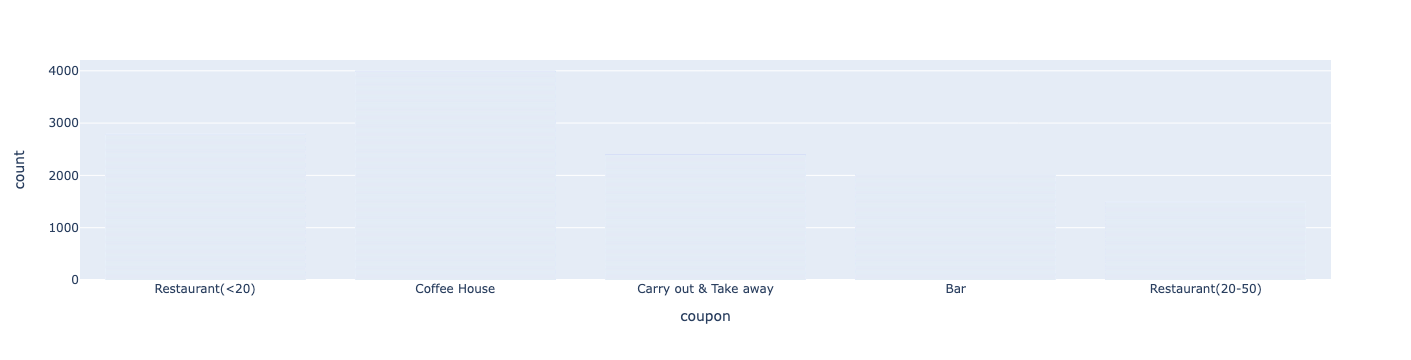

In [43]:
fig = px.bar(data, x='coupon')
fig.show()

6. Use a histogram to visualize the temperature column.

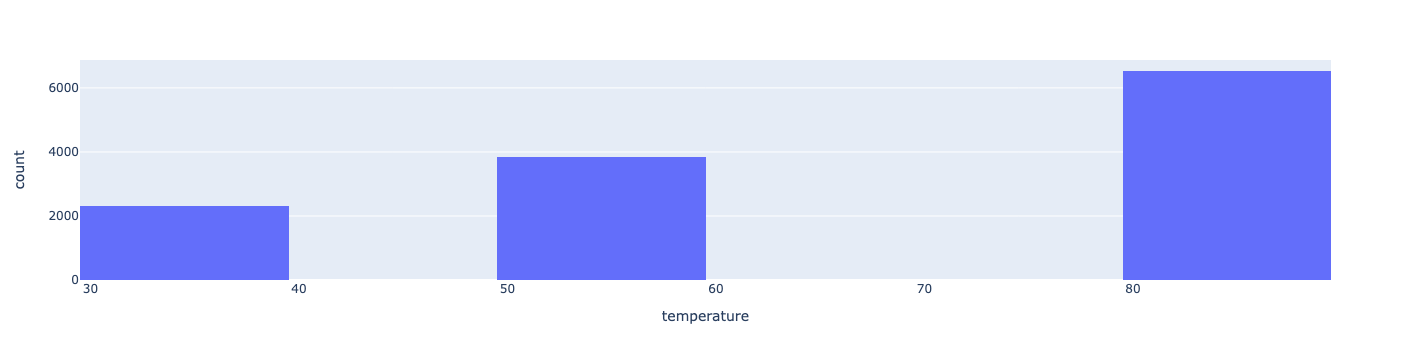

In [44]:
fig = px.histogram(data, x="temperature", nbins=10)
fig.show()

<AxesSubplot:xlabel='temperature', ylabel='Count'>

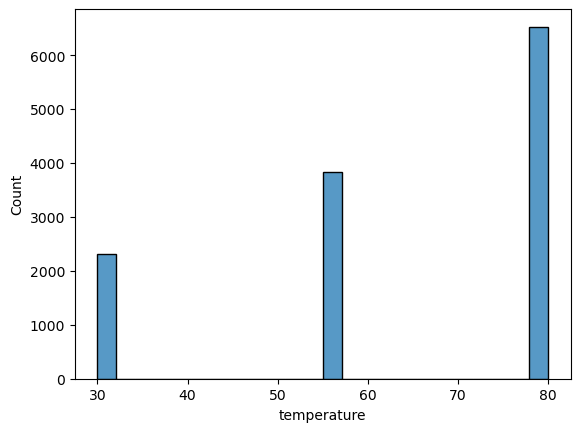

In [45]:
sns.histplot(data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [46]:
bar_df = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [47]:
bar_df['Y'].value_counts(normalize=True).loc[1]

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [48]:
more_than_3 = ['4~8', 'gt8']

more = bar_df.query('Bar in @more_than_3')[['Y']].value_counts(normalize=True).loc[1].values[0]
less = bar_df.query('Bar not in @more_than_3')[['Y']].value_counts(normalize=True).loc[1].values[0]
print('Acceptance rate:')
print('Went to Bar 3 times or less: ', less)
print('Went to Bar more than 3 times: ', more)

Acceptance rate:
Went to Bar 3 times or less:  0.37073707370737075
Went to Bar more than 3 times:  0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [49]:
one_and_less = ['never', 'less1']
below_25 = ['21', 'below21']

bar_over_25 = bar_df.query('Bar not in @one_and_less and age not in @below_25')[['Y']].value_counts(normalize=True).loc[1].values[0]
bar_under_25 = bar_df.query('Bar in @one_and_less or age in @below_25')[['Y']].value_counts(normalize=True).loc[1].values[0]
print('Acceptance rate of drivers who go to a Bar:')
print('more than once a month and are over the age of 25: ', bar_over_25)
print('less than once a month or are under the age of 25: ', bar_under_25)

Acceptance rate of drivers who go to a Bar:
more than once a month and are over the age of 25:  0.6952380952380952
less than once a month or are under the age of 25:  0.33500313087038197


Acceptance rate is high for drivers over 25 and has visited Bar more than 1 in a month.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [50]:
below_25 = ['21', 'below21']

bar_df.query('Bar not in @one_and_less and passanger != "Kid(s)" and occupation != \'Farming Fishing & Forestry\'')[['Y']].value_counts(normalize=True).loc[1].values[0]

0.7132486388384754

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [51]:
one_and_less = ['never', 'less1']
below_30 = ['21', 'below21', '26']
cheap_res_freq = ['4~8', 'gt8']
less_than_50k_income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

bypassanger = bar_df.query('Bar not in @one_and_less and passanger != "Kid(s)" and maritalStatus != "Widowed"')[['Y']].value_counts(normalize=True).loc[1].values[0]
byage = bar_df.query('Bar not in @one_and_less and age in @below_30')[['Y']].value_counts(normalize=True).loc[1].values[0]
bycheapresturant = bar_df.query('RestaurantLessThan20 in @cheap_res_freq and income in @less_than_50k_income')[['Y']].value_counts(normalize=True).loc[1].values[0]

print('Acceptane Rate:')
print('1) go to bars more than once a month, had passengers that were not a kid, and were not widowed:', bypassanger)
print('2) go to bars more than once a month and are under the age of 30:', byage)
print('3) go to cheap restaurants more than 4 times a month and income is less than 50K:', bycheapresturant)

Acceptane Rate:
1) go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.7132486388384754
2) go to bars more than once a month and are under the age of 30: 0.7217391304347827
3) go to cheap restaurants more than 4 times a month and income is less than 50K: 0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Overall coupon acceptance rate is 41% but for driver that usually go more than 3 times a month, has a 77% acceptance rate. Drivers above age 21 has 68% acceptance chance.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Coupon Acceptance rate

In [52]:
data.groupby('coupon')[['Y']].value_counts(normalize=True).sort_values(ascending=False)

coupon                 Y
Carry out & Take away  1    0.735478
Restaurant(<20)        1    0.707107
Bar                    0    0.589985
Restaurant(20-50)      0    0.558981
Coffee House           0    0.500751
                       1    0.499249
Restaurant(20-50)      1    0.441019
Bar                    1    0.410015
Restaurant(<20)        0    0.292893
Carry out & Take away  0    0.264522
dtype: float64

The acceptance rate of "Carry out & Take away" is the higest (73%) among other coupons and Bar coupon is lowest (41%) of all.

#### Function to help us find rate for 1 or more columns

In [53]:
def acceptance_rate(df_ro):
    new_df = pd.DataFrame()
    for col in df_ro.columns:
        if col == 'Y':
            continue
        df = df_ro.groupby(col)[['Y']].value_counts(normalize=True).reset_index(name='rate').rename({col: 'results'}, axis=1)#.query('Y == 1 and rate > 0.5')
        df['results'] = df['results'].apply(lambda x: "{}{}".format(col + "-", x)) #prefix all resutls with col. name to distinguish
        new_df = pd.concat([new_df, df], ignore_index=True)
    return new_df.sort_values('rate', ascending=False) #sort the values by rate

##### Let's look at columns acceptance rate

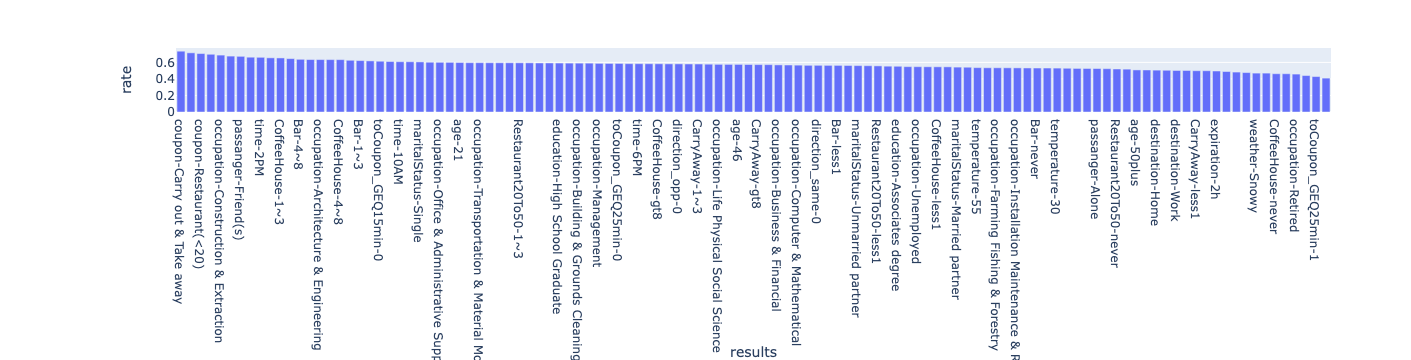

In [54]:
fig = px.bar(acceptance_rate(data).query('Y == 1'), y='rate', x='results')
fig.show()

### Observations
- Carry out and Take away coupon has the highest acceptance rate (73%)
- Bar and Resturant(20-50) coupon has the lowest acceptance rate. (41%)
- Coupon for cheap resturant has high acceptance rate(71%)
- Drivers with High school education has high acceptance rate (72%)
- 2PM time has hihest acceptance rate
- Driver with Health care or construction&Extraction occupation has high acceptance rate (70%)
- Retired Drivers has low acceptance rate (46%)
- High acceptance rate if passanger is Friend(s). (67%)
- Widowed has low acceptance rate.

### Restaurant(20-50) Coupon Acceptance rate

Restaurant(20-50) is the second coupon category that has a low acceptance rate (44%). Let dig more and see if we can find interesting combination that has better acceptance rate.

In [55]:
r20_50_df = data.query('coupon == "Restaurant(20-50)"') # only get relevent data

In [56]:
r20_50_df['Y'].value_counts(normalize=True)

0    0.558981
1    0.441019
Name: Y, dtype: float64

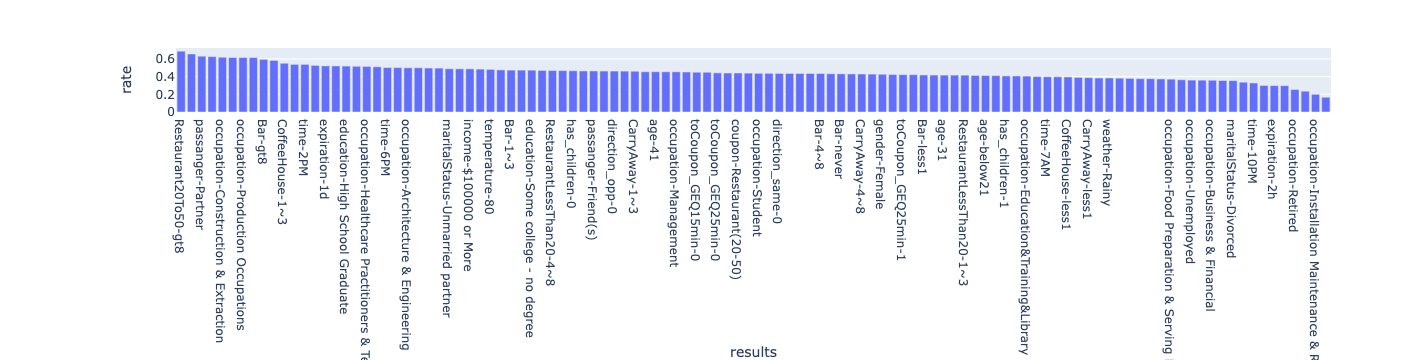

In [57]:
fig = px.bar(acceptance_rate(r20_50_df).query('Y == 1'),y='rate', x='results')
fig.show()

### Observations

High acceptance rate for
- Drivers that goes to Restaurant20To50 more than 3 times per month
- Passanger as patner
- Occupation as HealthCare support, Construction & extraction or Production Occupations
- and goes to Bar more than 8 times per month
- Time 10 AM

Let put this together to find high acceptance rate

In [58]:
more_than_3 = ['4~8', 'gt8']
r20_50_df.query('Restaurant20To50 in @more_than_3 and passanger =="Partner" and occupation != "Retired"')[['Y']].value_counts(normalize=True).loc[1].values[0]

0.6666666666666666

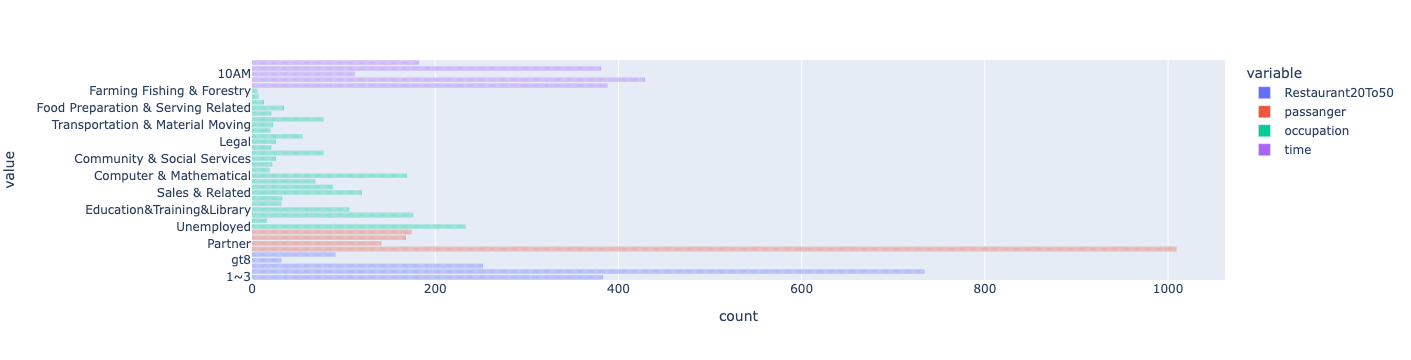

In [59]:
fig = px.bar(r20_50_df, x=['Restaurant20To50', 'passanger', 'occupation', 'time'])
fig.show()

#### Coupon Acceptance rate by Age

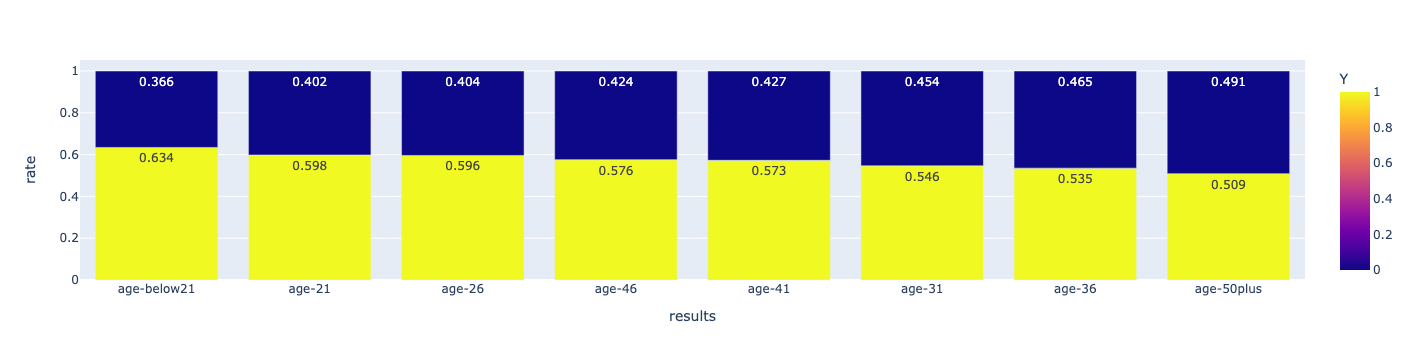

In [60]:
fig = px.bar(acceptance_rate(data[['age','Y']]), y='rate', x='results', color='Y', text_auto='.3')
fig.show()

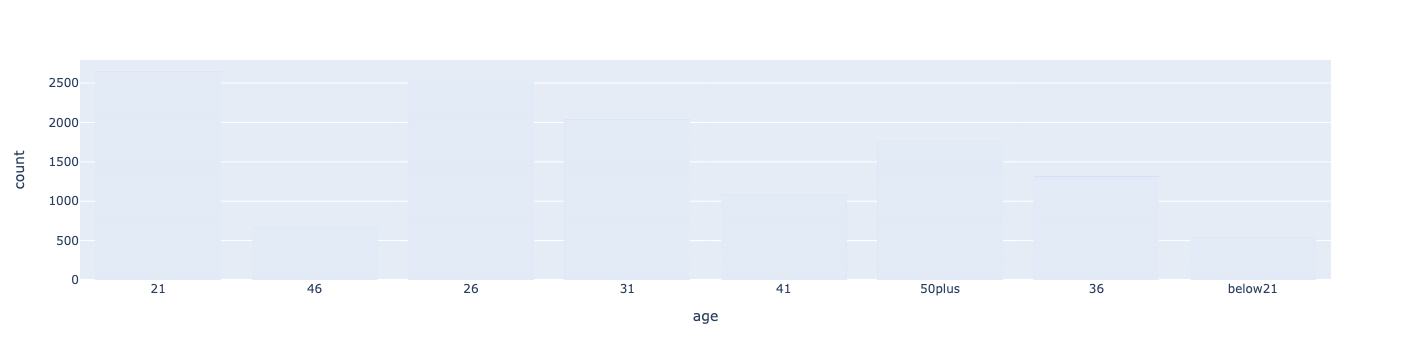

In [61]:
fig = px.bar(data, x='age')
fig.show()

#### Observation
- Age below 21 has high acceptance rate.

### High acceptance rate in each field

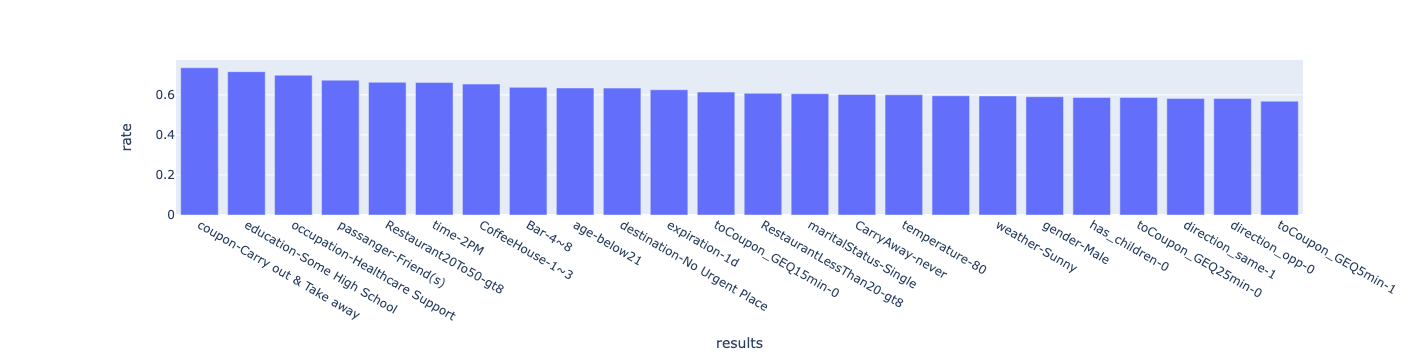

In [62]:
new_df = pd.DataFrame()
for col in data.columns:
    if col == 'Y':
        continue
    df = data.groupby(col)[['Y']].value_counts(normalize=True).reset_index(name='rate').rename({col: 'results'}, axis=1).query('Y ==1')
    df['results'] = df['results'].apply(lambda x: "{}{}".format(col + "-", x)) #prefix all resutls with col. name to distinguish
    df = df.sort_values('rate', ascending=False).head(1)
    new_df = pd.concat([new_df, df], ignore_index=True)

new_df.sort_values('rate', ascending=False, inplace=True)
fig = px.bar(new_df,y='rate', x='results')
fig.show()

### High data values

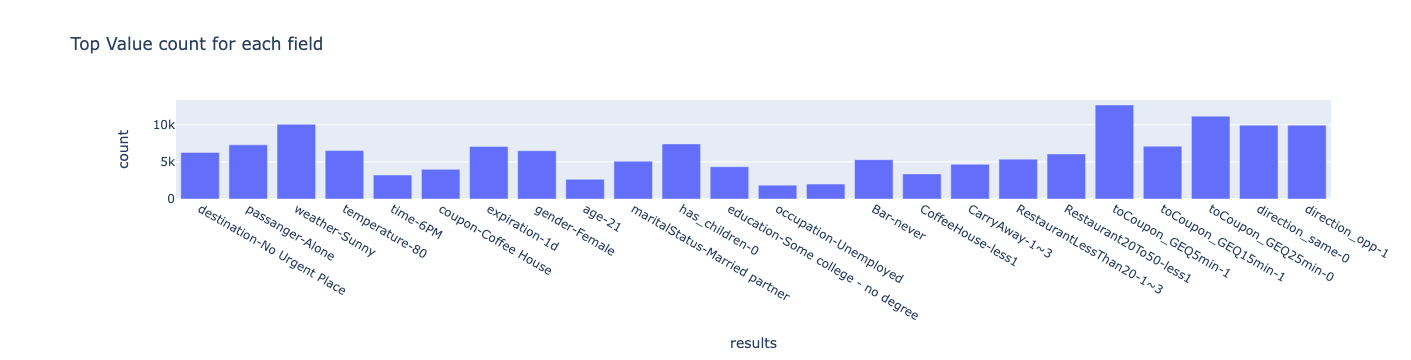

In [63]:
new_df = pd.DataFrame()
for col in data.columns:
    if col == 'Y':
        continue
    df = data.groupby(col)[[col]].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).rename({col: 'results'}, axis=1).head(1)
    df['results'] = df['results'].apply(lambda x: "{}{}".format(col + "-", x)) #prefix all resutls with col. name to distinguish
    df = df.sort_values('count', ascending=False)
    new_df = pd.concat([new_df, df], ignore_index=True)
fig = px.bar(new_df,y='count', x='results', title='Top Value count for each field')
fig.show()

### Summary

- Coupon: Carry out & Take away has the higest acceptance rate (74%)
- Some of the low acceptance rate can be drill down into to find correlation between fields and can be use to increae the acceptance rate.
- Majority of the data has Weather as Sunny and almost 50% of the data had a temprature of 80.
- Almost 50% of the destination data is set to 'No Urgent Place'